# INVESTIGATING VARIANCE OF REGRESSION MODELS

In this notebook we will study how **variance increases as model complexity increases**. As model complexity increases we get very different fits for different data sets; the model fits become very sensitive to dataset. 

**Adding the directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import statements**

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from m_learn.utility.data_preprocessing import polynomial_dataFrame
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

**Load and shuffle the data**

In [4]:
data = pd.read_csv('./../../data/house_prices/train.csv')
data = data.sample(frac=1, random_state = 0).reset_index(drop = True)    

## 1. A function which plots fits of polynomial models trained on different data sets

In [5]:
def variance_analysis_regression(datas, degree, regression_model, feature, output, subplot_dimension,**kwargs):
    
    '''
    A function which plots fits of same regression model fitted on different polynomial datasets.
    Arguments:
    datas - a list of pandas dataframe containing splits of data
    degree - model complexity of the models
    regression_model - an object of a sklearn regression model
    feature - feature of the model whose polynomial is wanted
    output - output of the model
    subplot_dimension: list containing dimensions of the subplot 
    kwargs - stores plot information
    '''
    
    # iterate through each data split in the list, 
    # train polynomial regression model on the data split,
    # and create subplot of the model fit
    for counter, data in enumerate(datas):
        
        ################# Fit regression model using polynomial data of training set #################
        
        # create a polynomial data up to the given degree
        polynomial_data = polynomial_dataFrame(data[feature], degree)
        # extract the output column
        output_data = data[output]        
        # fit the model using the training data
        regression_model.fit(polynomial_data, output_data)
        
        ########################### Compute predictions of training points ###########################
        
        # extract the power columns of the dataframe
        feature_columns = polynomial_data.columns.values.tolist()
        # add the output columnn to the data
        polynomial_data[output] = data[output]
        # sort the dataframe by degree 1 polynomial so that points in the plot join sequentially
        polynomial_data = polynomial_data.sort_values(['power1', output])
        # compute predictions of the training points
        predictions = model.predict(polynomial_data[feature_columns])

        ################################# Create subplot of the model fit #################################
        
        # create a subplot of the model fit 
        plt.subplot(subplot_dimension[0], subplot_dimension[1], counter+1)
        plt.scatter(polynomial_data['power1'], polynomial_data[output], linewidths  = 0.05, marker = '.')
        plt.plot(polynomial_data['power1'], predictions, '-', linewidth = 1, color = 'green')
        plt.xlabel(kwargs['xlabel'])
        plt.ylabel(kwargs['ylabel'])
        plt.title("Dataset " + str(counter+1), fontsize = 'medium')
        plt.grid()
        
    
    # adjust height and width space of the subplot   
    plt.subplots_adjust(wspace = 0.45, hspace = 0.40)
    # add the grand title to the whole figure
    plt.suptitle("Degree: "+ str(degree), fontsize = 16)
    plt.show()

## 2. Fits of polynomial models on different data splits

**Feature and output of the model**

In [6]:
feature = 'GrLivArea'
output = 'SalePrice'

**Create a linear regression model**

In [7]:
model = LinearRegression()

### 2.1 Plot of model fits (Degree: 2 | #Splits: 4)

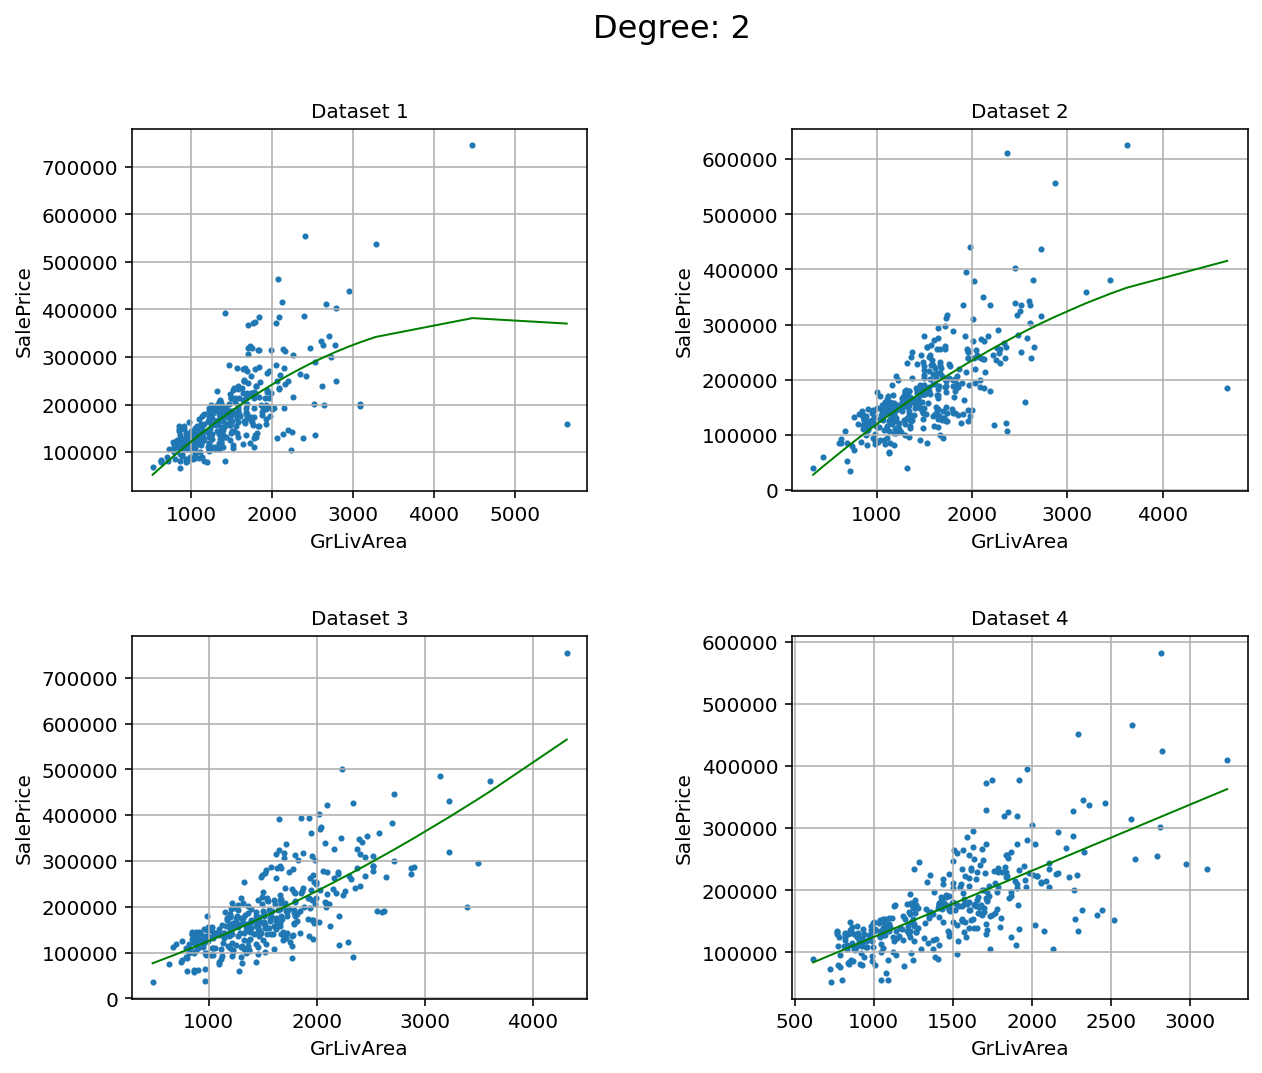

In [8]:
# configure the size of matplotlib plot
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# number of splits of data
no_of_splits = 4 
# degree of model
degree = 2
# carry out the split
datas = np.array_split(data, no_of_splits)
# plot of fits of same model on different datasets
variance_analysis_regression(datas, degree , model, feature , output, [2,2], xlabel = "GrLivArea", ylabel = "SalePrice")

### 2.2 Plot of model fits (Degree: 5 | #Splits: 4)

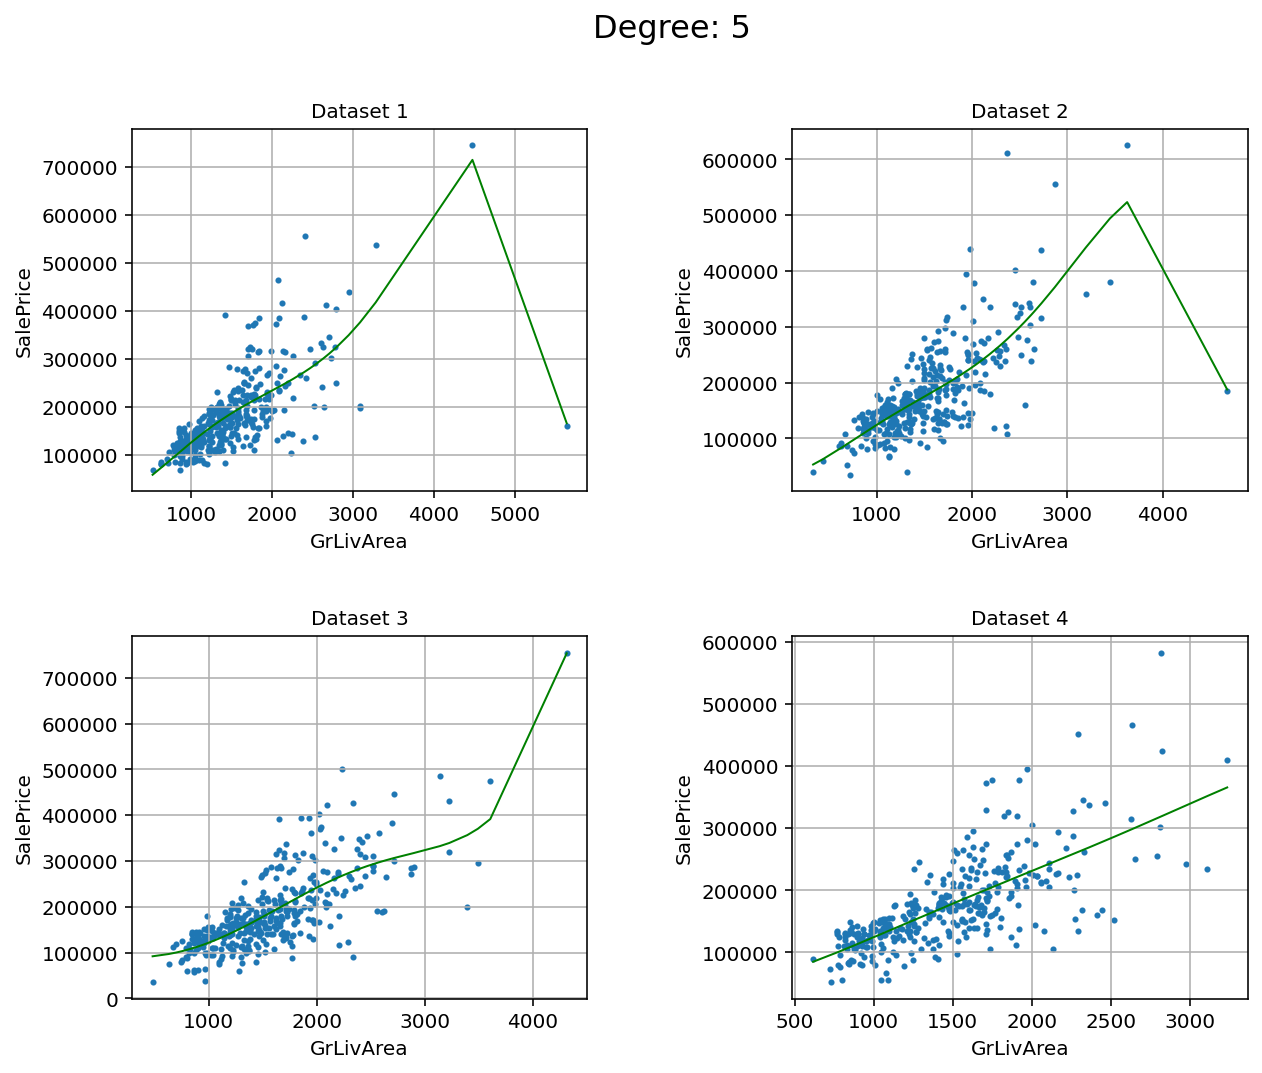

In [9]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
no_of_splits = 4
degree = 5
datas = np.array_split(data, no_of_splits)
variance_analysis_regression(datas, degree , model, feature, output, [2,2], xlabel = "GrLivArea", ylabel = "SalePrice")

### 2.3 Plot of model fits (Degree: 10 | #Splits: 4)

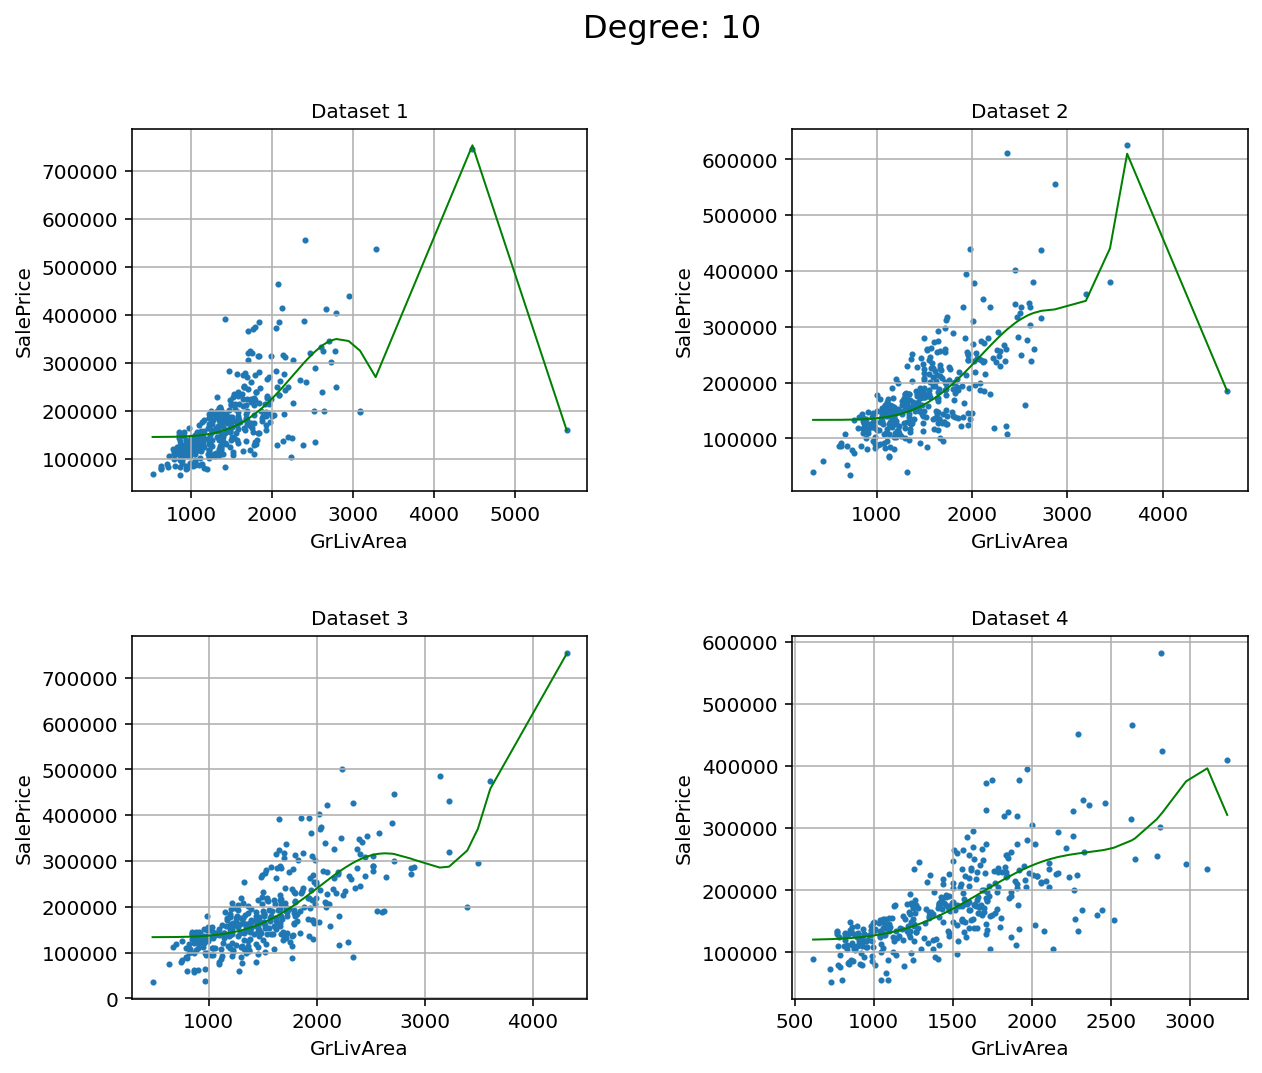

In [10]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
no_of_splits = 4
degree = 10
datas = np.array_split(data, no_of_splits)
variance_analysis_regression(datas, degree , model, feature, output, [2,2], xlabel = "GrLivArea", ylabel = "SalePrice")

### 2.4 Plot of model fits (Degree: 10 | #Splits: 9)

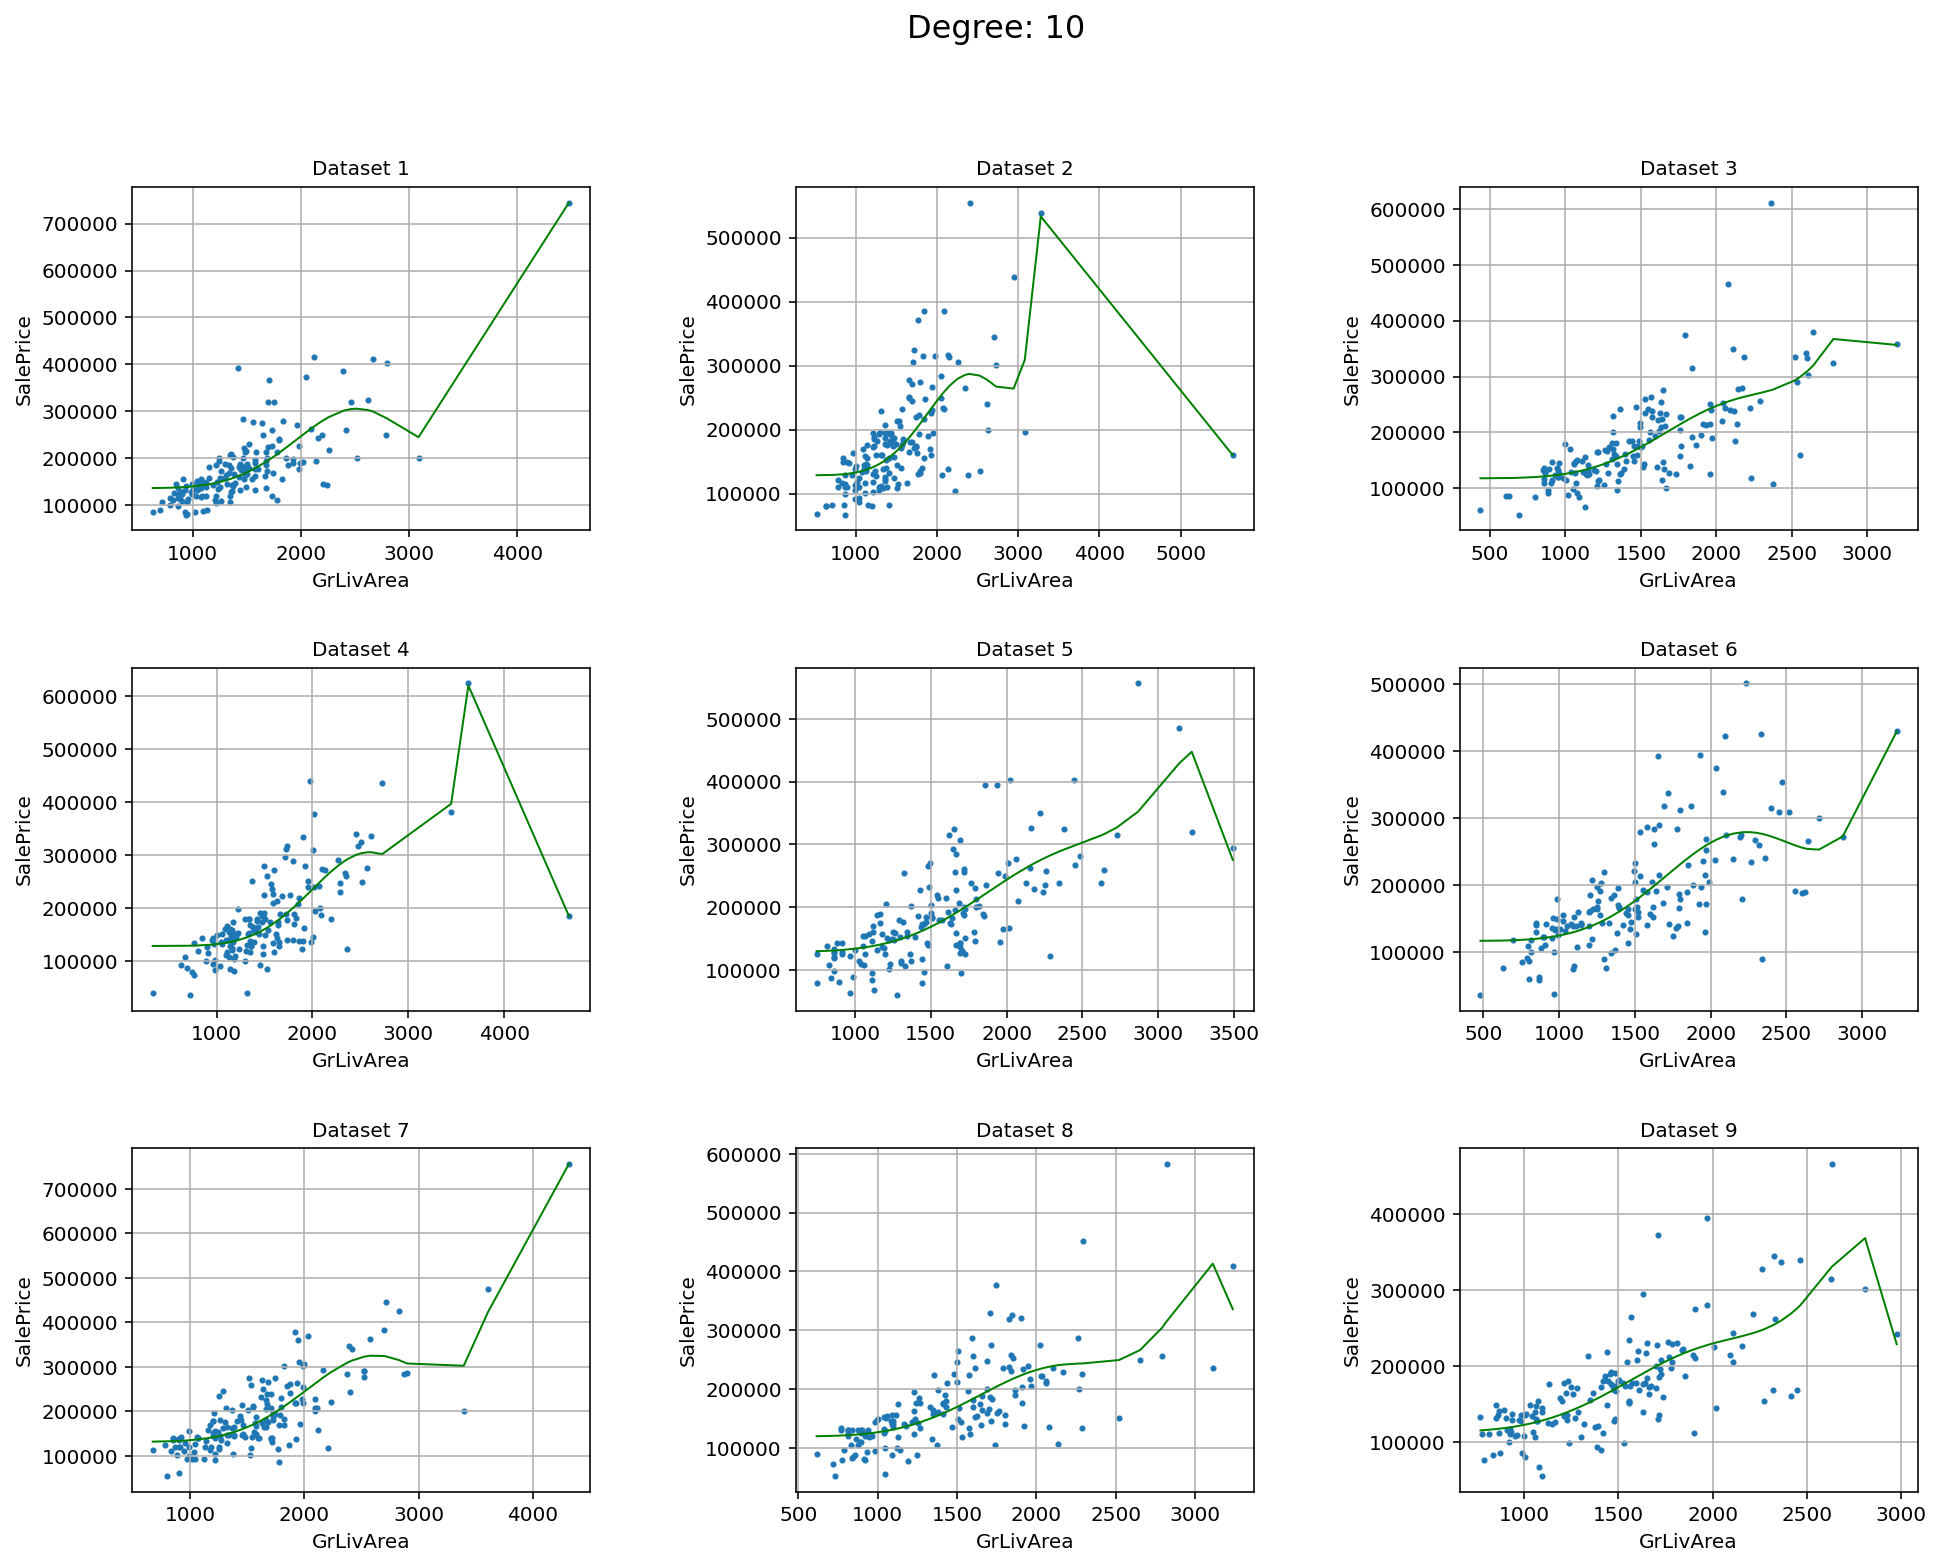

In [11]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
no_of_splits = 9
degree = 10
datas = np.array_split(data, no_of_splits)
variance_analysis_regression(datas, degree , model, feature, output, [3,3], xlabel = "GrLivArea", ylabel = "SalePrice")

### 2.5 Plot of model fits (Degree: 10 | #Splits: 16)

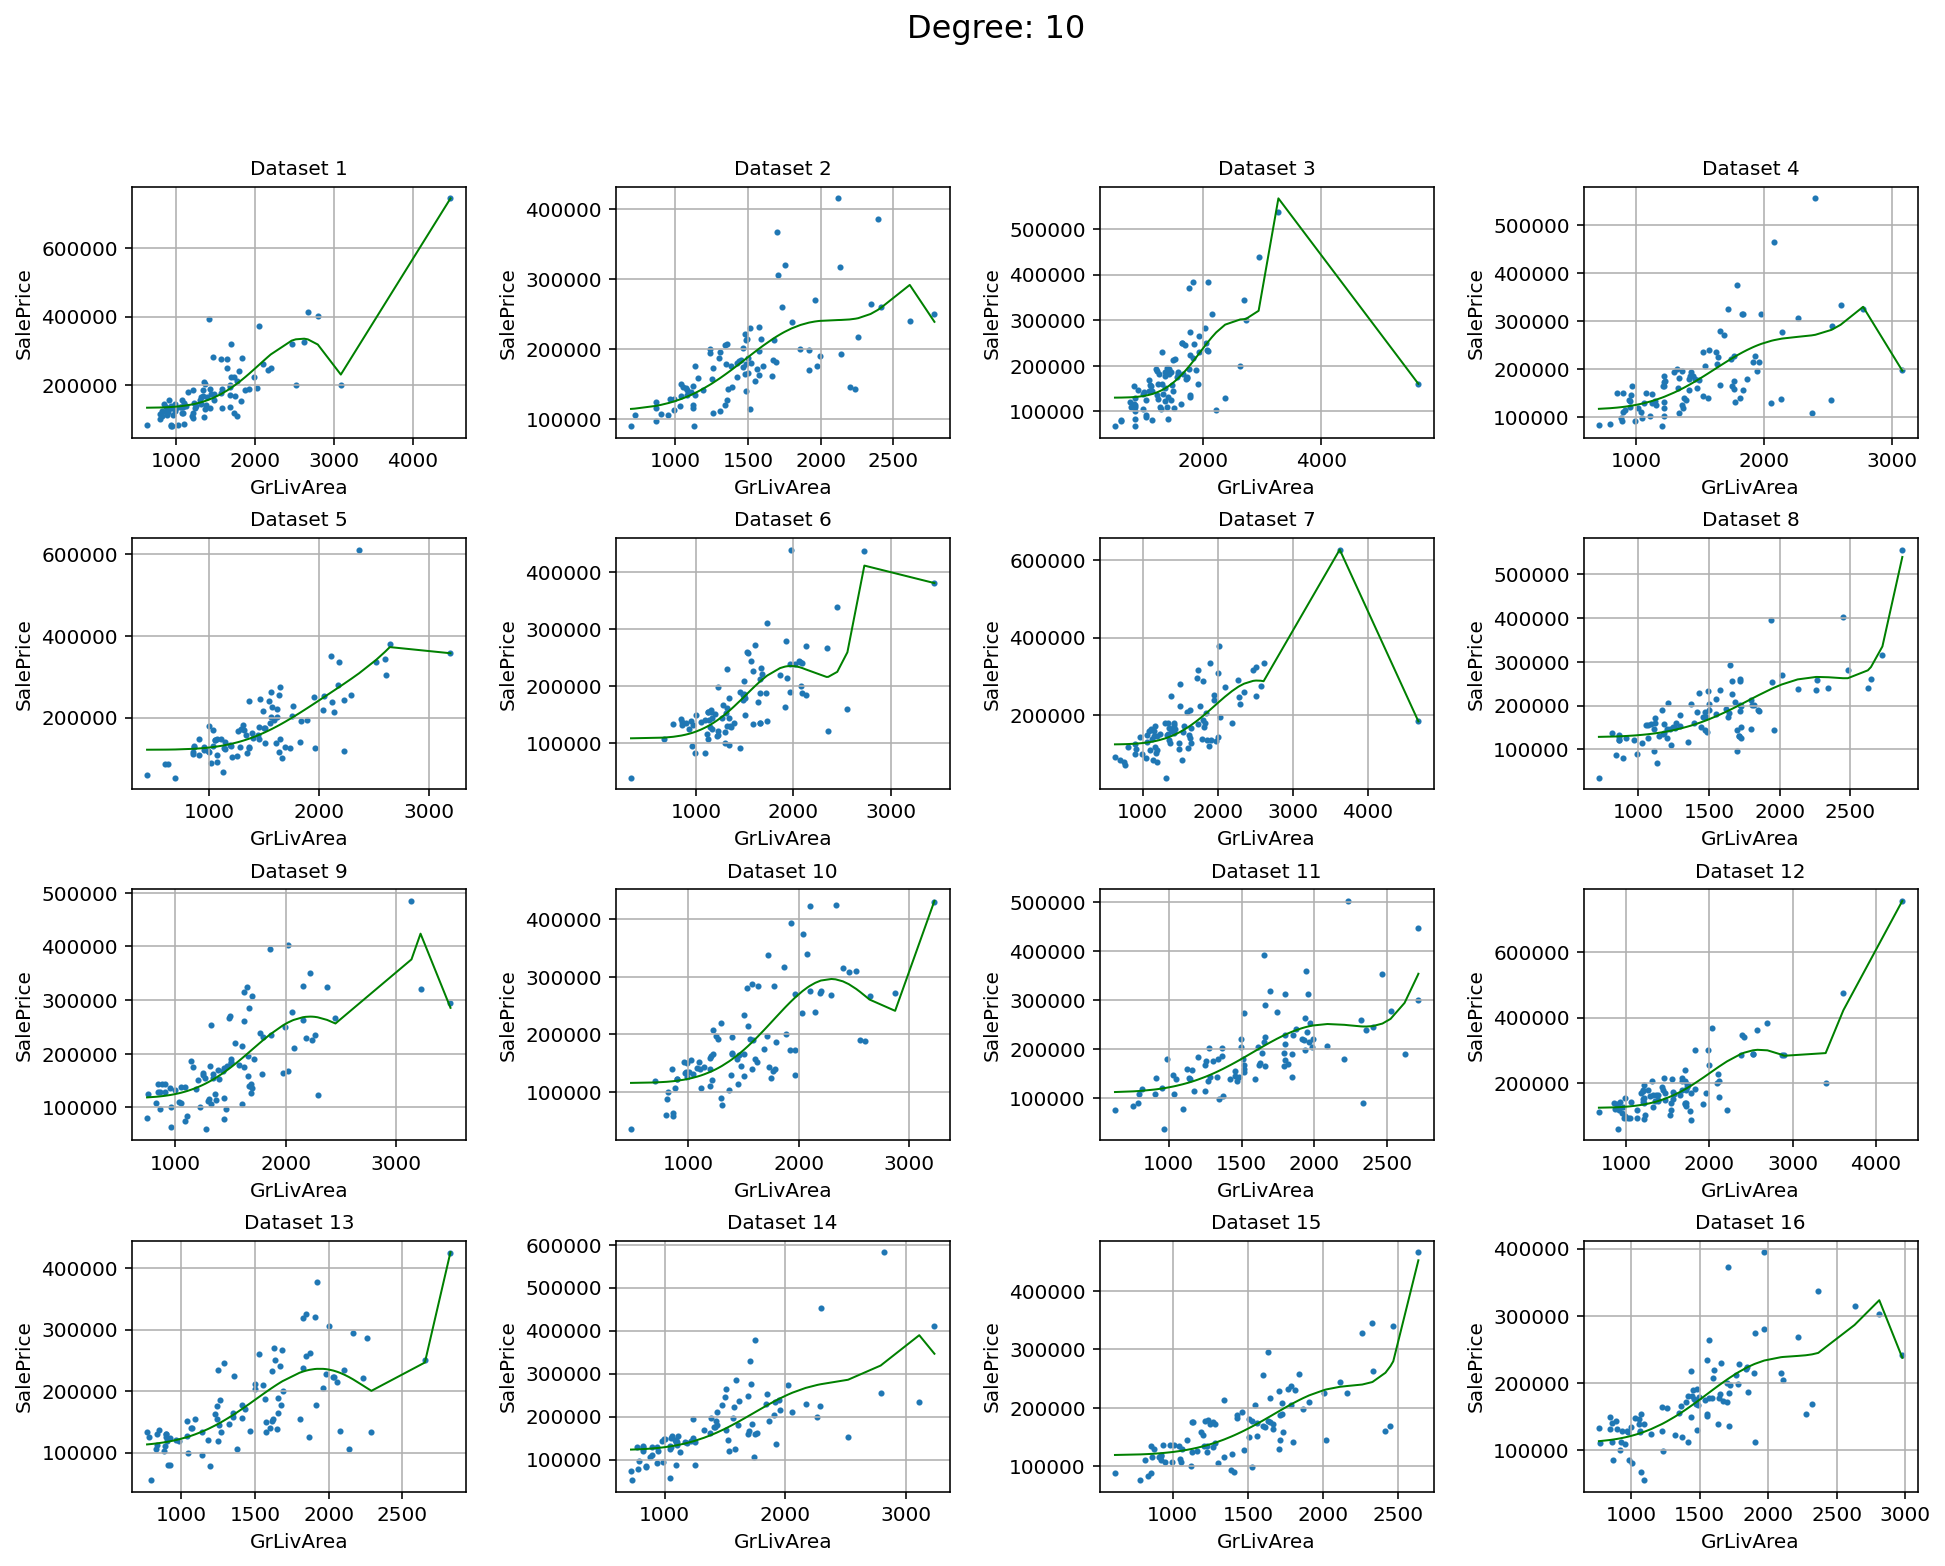

In [12]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
no_of_splits = 16
degree = 10
datas = np.array_split(data, no_of_splits)
variance_analysis_regression(datas, degree , model, feature, output, [4,4], xlabel = "GrLivArea", ylabel = "SalePrice")